In [287]:
%run HomogeneousRelation.ipynb

R(A→B) = {(4, 4), (2, 4), (3, 4), (2, 3), (3, 2), (1, 3), (3, 5)}
   1, 2, 3, 4, 5
1 [0, 0, 1, 0, 0]
2 [0, 0, 1, 1, 0]
3 [0, 1, 0, 1, 1]
4 [0, 0, 0, 1, 0]
5 [0, 0, 0, 0, 0]

R comlement = {(3, 4), (4, 3), (3, 1), (5, 4), (5, 1), (2, 2), (2, 5), (4, 2), (4, 5), (3, 3), (5, 3), (1, 2), (2, 1), (1, 5), (3, 2), (4, 4), (5, 5), (1, 1), (1, 4)}
   1, 2, 3, 4, 5
1 [1, 1, 0, 1, 1]
2 [1, 1, 0, 0, 1]
3 [1, 1, 1, 1, 0]
4 [0, 1, 1, 1, 1]
5 [1, 0, 1, 1, 1]

S(A→B) = {(2, 4), (3, 3), (3, 2), (2, 5), (4, 1)}
   1, 2, 3, 4, 5
1 [0, 0, 0, 0, 0]
2 [0, 0, 0, 1, 1]
3 [0, 1, 1, 0, 0]
4 [1, 0, 0, 0, 0]
5 [0, 0, 0, 0, 0]

R x S = {(1, 3), (1, 2), (2, 1), (3, 4), (3, 1), (2, 3), (2, 2), (4, 1), (3, 5)}
   1, 2, 3, 4, 5
1 [0, 1, 1, 0, 0]
2 [1, 1, 1, 0, 0]
3 [1, 0, 0, 1, 1]
4 [1, 0, 0, 0, 0]
5 [0, 0, 0, 0, 0]

converse = {(3, 1), (1, 4), (4, 2), (5, 3), (3, 2), (2, 5)}
   1, 2, 3, 4, 5
1 [0, 0, 0, 1, 0]
2 [0, 0, 0, 0, 1]
3 [1, 1, 0, 0, 0]
4 [0, 1, 0, 0, 0]
5 [0, 0, 1, 0, 0]

R = {(2, 4), (5, 5), (5, 4), (4, 5),

# Čiastočné usporiadania

In [330]:
class PartialOrder(HomogeneousRelation):
    
    def setRelation(self, bRelation):
        self.bRelation = bRelation
        
        print(self.isReflexive())
        print(self.isAntisymetric())
        print(self.isTransitive())
        
        if (self.isReflexive()) and (self.isAntisymetric()) and (self.isTransitive()):
            print("Partial Order OK!")
        else:
            raise Exception("Not Partial Order!")
            
    def makeGraph(self, name="graph",filename='cluster.gv'):
        g = Digraph(name=name, node_attr={'shape': 'circle'})
        g.body.append(f'\t label="{self.name}"')
        g.body.append('\t rankdir=BT;')   
        g.body.append('\t edge [arrowhead="none"];')
        
        dic = dict()
        for elem in self.getSetA():
            #g.node(str(elem))
            dic[elem] = self.inRelationWith(elem)

        for elem in self.getSetA():
            h = dic[elem]
            for s in dic.keys():
                if elem != s and s in dic[elem]:
                    h = self.diff(h,self.diff(dic[s], {s}))

            for p in h:
                if elem != p:
                    g.edge(str(elem),str(p))


        return g
        

Partial Order OK!


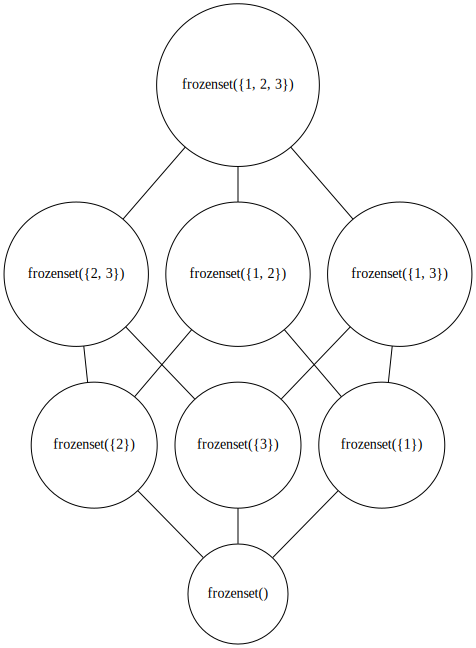

In [318]:
array = [[],[1],[2],[3],[1,2],[1,3],[2,3],[1,2,3]]
fset = set()
for elem in array:
    fset.add(frozenset(elem))
    
r = set(itertools.product(fset,fset))

br = set()
for elem in r:
    a,b = elem
    if a.issubset(b):
        br.add((a,b))

p = PartialOrder(fset)
p.setRelation(br)
p.setName("")

p.makeGraph()

Partial Order OK!


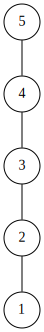

In [316]:
import itertools 

A = {1,2,3,4,5}
r = set(itertools.product(A,A))

br = set()
for elem in r:
    a,b = elem
    if a <= b:
        br.add((a,b))
        
p = PartialOrder(A)
p.setRelation(br)
p.setName("")

p.makeGraph()

Partial Order OK!


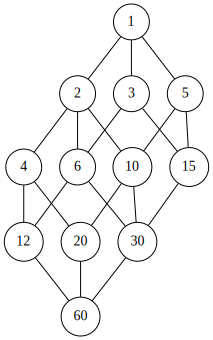

In [317]:
 A = {1,2,3,4,5,6,10,12,15,20,30,60}
    
r = set(itertools.product(A,A))

br = set()
for elem in r:
    a,b = elem
    if a % b == 0:
        br.add((a,b))
        
p = PartialOrder(A)
p.setRelation(br)
p.setName("")

p.makeGraph()

True
True
True
Partial Order OK!


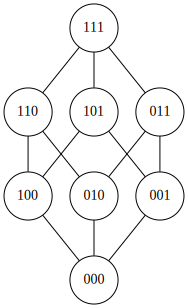

In [339]:
def foo(a,b):
    for i in range(len(a)):
        if a[i] == '1' and b[i] == '0':
            return False
    return True

A = set(["".join(item) for item in itertools.product("10", repeat=3)])

r = set(itertools.product(A,A))

br = set()
for elem in r:
    a,b = elem
    if foo(a,b):
        br.add((a,b))
        
p = PartialOrder(A)
p.setRelation(br)
p.setName("")

p.makeGraph()
    

True
True
True
Partial Order OK!


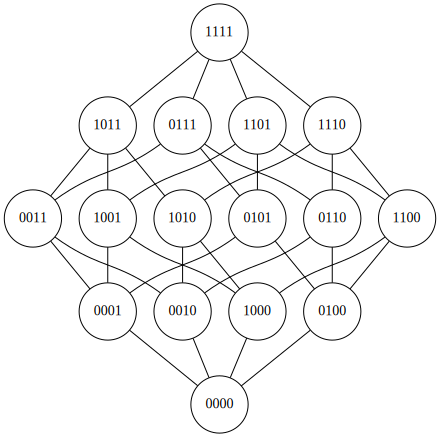

In [342]:
A = set(["".join(item) for item in itertools.product("10", repeat=4)])

r = set(itertools.product(A,A))

br = set()
for elem in r:
    a,b = elem
    if foo(a,b):
        br.add((a,b))
        
p = PartialOrder(A)
p.setRelation(br)
p.setName("")

p.makeGraph()